In [1]:
# CS825 - Computer Networks
# Student Name:  Sandeep Kumar Paul
# Assignment-1

### Install important libraries

In [1]:
# Install required libraries using below conda command:
# If already these libaries installed in the system, then comment the lines(5-7)
import sys

#!conda install --yes --prefix {sys.prefix} numpy
#!conda install --yes --prefix {sys.prefix} matplotlib
#!conda install --yes --prefix {sys.prefix} seaborn

In [2]:
# import below python libraries
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 6(a)
### What was the minimum, maximum, mean, and median latency of the pings that succeeded? Ignore pings that failed in the calculation. What was the standard deviation of latency?

In [5]:
# Here, I have used the regular expression to search a specific string for latency
latency = []
counter = 0
with open('ping.txt') as pingfile1:
    for row in pingfile1:
        counter = counter + 1
        match = re.search(r'time=(\S+)', row)
        #print(match)
        if match:
            latency.append(match.group(1))
print(counter)  # Total number of pings

3004


In [6]:
latency_length = len(latency)
print('Length of total succeded pings: ',latency_length)

Length of total succeded pings:  2883


In [7]:
# Convert the list to numpay array
latency_array = np.array(latency)

In [8]:
# Convert the string array to float array for mathematical calculation
latency_array = latency_array.astype(np.float)

### Minimum Latency

In [9]:
np.amin(latency_array)

2.335

### Maximum Latency

In [10]:
np.amax(latency_array)

521.617

### Mean Latency

In [11]:
print('Mean Latency is: ',np.mean(latency_array))

Mean Latency is:  131.28713146028443


### Standrad deviation Latency

In [12]:
print('Standard deviation of latency is: ', np.std(latency_array))

Standard deviation of latency is:  81.39211843475798


### Median  Latency

In [13]:
print('Median of Latency is: ',np.median(latency_array))

Median of Latency is:  142.544


## 6) (b)  
## Packet Loss Ratio

- total number of packets lost / total number of packets received(latency_length)
- total packet lost = total ping counts(#Counter) - total number of packets Received(#latency)

In [14]:
# total number of Packets lost
packet_received = latency_length
packet_loss = counter-latency_length
print(packet_loss)

121


In [15]:
print('Packet Loss Rate is: {:.3f}'.format(packet_loss/packet_received))

Packet Loss Rate is: 0.042


## 6 (c)
### What was the average and maximum length of the period when packets were not delivered? Note that in the experiments here, the pings were sent at the default rate of one per second.

In [16]:
period = []
c_count = 0
c_max = 0
last_match = False
c_sum = 0
c_appear = 0
with open('ping.txt') as pingfile2:
    for row in pingfile2:
        match = re.search(r'Request timeout\b', row)
        if match:
            c_count = c_count+1
            if (c_max < c_count):
                c_max = c_count
            if (last_match == False):
                c_appear = c_appear+1
            last_match = True         
        else:
            c_sum = c_sum+c_count
            c_count =0
            last_match=False

    #print('c_appear',c_appear)
    #print('c_sum',c_sum)
    print('Average length of the period when packets were not delivered: {:.3f} second'.format(float(c_sum / c_appear)))    
    print('Maximum length of the period when packets were not delivered: {} second'.format(c_max))


Average length of the period when packets were not delivered: 1.071 second
Maximum length of the period when packets were not delivered: 3 second


## 6 (d)
### Come up with a graph that visualizes the distribution of the ping latencies. There are several ways to do this, there is no specific one that I am looking for. The goal is to find a method to display the data in a way that is clear and easy to understand.

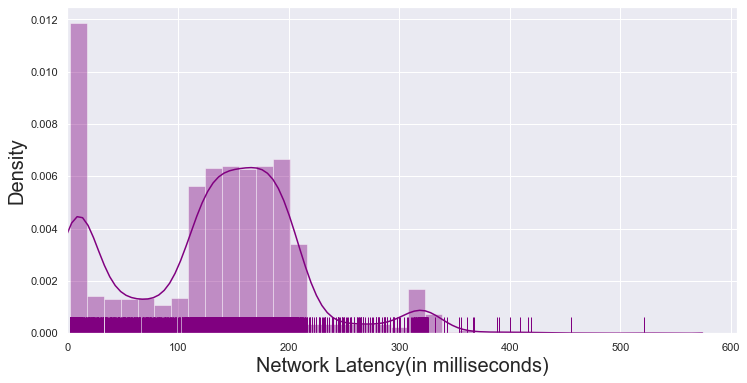

In [17]:
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(12,6)})
# distribution plot of latency using seaborn python library
dist_plot = sns.distplot(latency_array,color='purple', rug=True)
plt.xlim(xmin=0)
plt.ylim(ymin=0)
plt.xlabel("Network Latency(in milliseconds)", fontsize=20)
plt.ylabel("Density", fontsize=20)
plt.show()

## 6 (e)
### Extra credit: Is there periodicity in the observed network latency?

#### Answer:
- As per above KDE(Kernel density estimate) plot, I can say there is no uniform periodicity in the given ping output. But I could see the count of latency range between 100 ms - 200ms is quite high as compared to other network latency values.